In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures'

import flotilla
study = flotilla.embark('singlecell_pnm_figure6_splicing_correlation_permuted', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-11-07 09:20:07	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure6_splicing_correlation_permuted/datapackage.json
2016-11-07 09:20:07	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-11-07 09:20:58 	Initializing Study
2016-11-07 09:20:58 	Initializing Predictor configuration manager for Study
2016-11-07 09:20:58	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-11-07 09:20:58	Added ExtraTreesClassifier to default predictors
2016-11-07 09:20:58	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-11-07 09:20:58	Added ExtraTreesRegressor to default predictors
2016-11-07 09:20:58	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-11-07 09:20:58	Added GradientBoos

Error loading species hg19 data: HTTP Error 404: Not Found

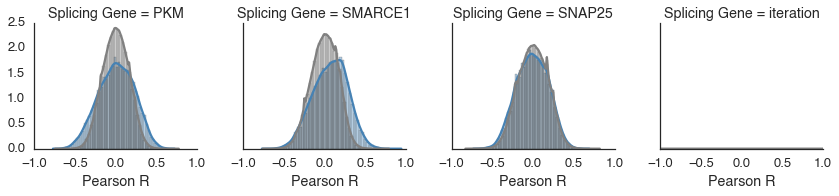

In [22]:
g = sns.FacetGrid(study.supplemental.splicing_expression_corr_with_permuted, 
                  hue='dataset', col='Splicing Gene', palette=['DarkTeal', 'Grey'], 
                  hue_order=['Actual', 'Permuted'])
g.map(sns.distplot, 'Pearson R')
g.set(xlim=(-1, 1))
g.savefig('{}/pearson_correlation_distplot.pdf'.format(folder))

In [6]:
means = study.supplemental.splicing_expression_corr_with_permuted.groupby(['Splicing Gene', 'dataset'])['Pearson R'].mean()
stds = study.supplemental.splicing_expression_corr_with_permuted.groupby(['Splicing Gene', 'dataset'])['Pearson R'].std()


In [19]:
multiplier = 3

In [20]:
lower_bound = means - multiplier*stds
lower_bound

Splicing Gene  dataset 
PKM            Actual       -0.647581
               Permuted     -0.474251
SMARCE1        Actual       -0.562876
               Permuted     -0.493314
SNAP25         Actual       -0.584435
               Permuted     -0.538973
iteration      Permuted   -366.524996
Name: Pearson R, dtype: float64

In [21]:
upper_bound = means + multiplier*stds
upper_bound

Splicing Gene  dataset 
PKM            Actual         0.657579
               Permuted       0.474338
SMARCE1        Actual         0.703471
               Permuted       0.493162
SNAP25         Actual         0.563954
               Permuted       0.538865
iteration      Permuted    1365.524996
Name: Pearson R, dtype: float64

In [15]:
rows = study.supplemental.splicing_expression_corr_with_permuted['Splicing Gene'] == 'iteration'
iteration = study.supplemental.splicing_expression_corr_with_permuted.loc[rows]
print(iteration.shape)
iteration.head()

(17458000, 4)


,Splicing Gene,level_1,Pearson R,dataset
52374000,iteration,0,0.0,Permuted
52374001,iteration,1,0.0,Permuted
52374002,iteration,2,0.0,Permuted
52374003,iteration,3,0.0,Permuted
52374004,iteration,4,0.0,Permuted


In [23]:
iteration.describe()

,Pearson R
count,1.745800e+07
mean,4.995000e+02
std,2.886750e+02
min,0.000000e+00
25%,2.497500e+02
50%,4.995000e+02
75%,7.492500e+02
max,9.990000e+02
